In [3]:
import os
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
base_dir = 'dogs_breed'
train_path = os.path.join(base_dir, 'train')
valid_path = os.path.join(base_dir, 'valid')

In [5]:
train_datagen = ImageDataGenerator(
 rescale=1./255,rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [16]:
train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)
print(train_path)

Found 16469 images belonging to 120 classes.
dogs_breed/train


In [18]:
val_gen = val_datagen.flow_from_directory(
    valid_path,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 4111 images belonging to 120 classes.


In [19]:
type(val_gen)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [20]:
imgs, labels = next(train_gen)

In [21]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [22]:
imgs, labels = next(val_gen)

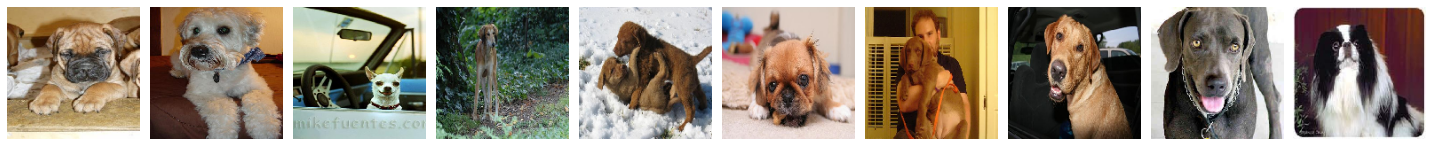

In [23]:
plotImages(imgs)

# CNN

In [24]:
inputs = tf.keras.layers.Input(shape=(150, 150, 3 ))
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [26]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='rmsprop')

In [ ]:
model.fit(train_gen, epochs=15, steps_per_epoch=823, validation_data=val_gen, validation_steps=205)

Epoch 1/15
823/823 [==============================] - 522s 633ms/step - loss: 0.0000e+00 - acc: 0.0094 - val_loss: 0.0000e+00 - val_acc: 0.0090
Epoch 2/15
823/823 [==============================] - 345s 419ms/step - loss: 0.0000e+00 - acc: 0.0092 - val_loss: 0.0000e+00 - val_acc: 0.0088
Epoch 3/15
823/823 [==============================] - 343s 417ms/step - loss: 0.0000e+00 - acc: 0.0093 - val_loss: 0.0000e+00 - val_acc: 0.0090
Epoch 4/15
823/823 [==============================] - 353s 429ms/step - loss: 0.0000e+00 - acc: 0.0099 - val_loss: 0.0000e+00 - val_acc: 0.0090
Epoch 5/15
358/823 [============>.................] - ETA: 3:24 - loss: 0.0000e+00 - acc: 0.0075